### Задание

Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

Описание задания:

В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а

именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о

недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать

информацию о признаках датасета можно, выполнив следующий код –

print(fetch_california_housing().DESCR).

### Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2. Проведите первичный анализ.

a.Проверьте данные на пропуски. Удалите в случае обнаружения.

b.*Нормализуйте один из признаков.


3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4. Обучите модель регрессии на обучающем множестве.

5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

6. Обучите дерево решений на обучающем множестве.

a. Повторите п. 5 для полученной модели.

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

a. Повторите п. 5 для полученной модели.

8. Сформулируйте выводы по проделанной работе.

a. Сравните точность двух моделей.

b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

#### Результат:

получены знания по работе с деревом решений

In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn import metrics

from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import missingno as msno 
# missingno предоставляет удобные средства для визуальной оценки пропусков

In [111]:
df = sklearn.datasets.fetch_california_housing()

In [112]:
# print(sklearn.datasets.fetch_california_housing().DESCR);

In [113]:
df_ = pd.DataFrame(df.data, columns=df.feature_names)
df_.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [114]:
df_.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [115]:
df_.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [116]:
df_.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [117]:
y = pd.DataFrame(df.target, columns=df.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [118]:
y.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [119]:
y.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [120]:
y.isna().sum()

MedHouseVal    0
dtype: int64

In [144]:
df_ = pd.concat([df_, y], axis=1)
df_
# собрал воедино ради удаления выбросов и визуализации 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseVal,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.721533,0.721533
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.698417,0.698417
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.700343,0.700343
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.545164,0.545164
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.608306,0.608306
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,NaN,NaN
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,NaN,NaN
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,NaN,NaN
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,NaN,NaN


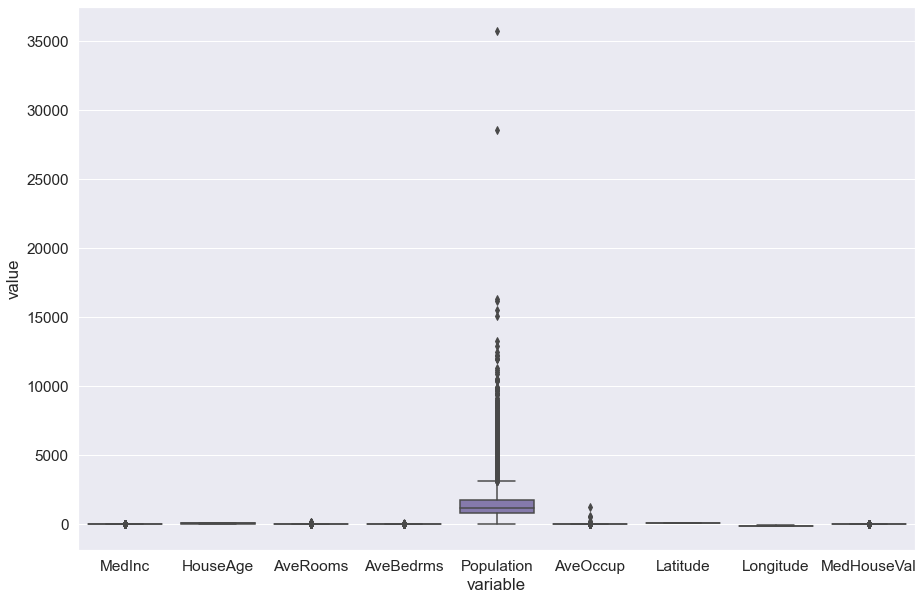

In [143]:
# посмотрим на выбросы
plt.figure(figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df_));

In [123]:
Q1 = df_.quantile(q=.25)
Q3 = df_.quantile(q=.75)
IQR = df_.apply(stats.iqr)
# удаляю выбросы 
# https://www.codecamp.ru/blog/remove-outliers-python/

df_removed = df_[~((df_< (Q1-1.5*IQR)) | (df_ > (Q3+1.5*IQR))).any(axis=1)]
df_removed

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [124]:
df_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16312 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16312 non-null  float64
 1   HouseAge     16312 non-null  float64
 2   AveRooms     16312 non-null  float64
 3   AveBedrms    16312 non-null  float64
 4   Population   16312 non-null  float64
 5   AveOccup     16312 non-null  float64
 6   Latitude     16312 non-null  float64
 7   Longitude    16312 non-null  float64
 8   MedHouseVal  16312 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [125]:
# нормализую датасэт
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = df_removed.columns
d = scaler.fit_transform(df_removed)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.899148,1.0,0.974334,0.555365,0.157020,0.482715,0.564293,0.215746,0.721533
1,0.683197,1.0,0.589487,0.554329,0.176847,0.407905,0.564293,0.214724,0.698417
2,0.442818,1.0,0.661838,0.575806,0.179085,0.300100,0.564293,0.214724,0.700343
3,0.468316,1.0,0.425054,0.636168,0.130476,0.287871,0.564293,0.214724,0.545164
4,0.417789,1.0,0.451571,0.228506,0.348257,0.284491,0.563231,0.214724,0.608306


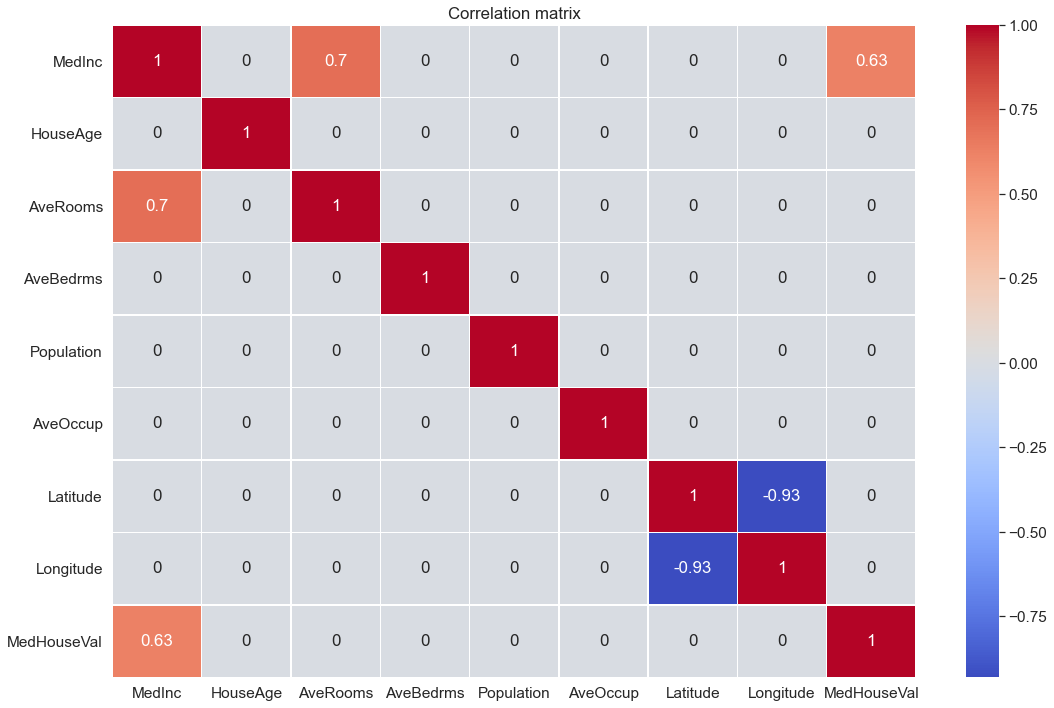

In [126]:
plt.figure(figsize=(18, 12))

sns.set(font_scale=1.4)

corr_matrix = scaled_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 # примем всё ниже 0,3 по модулю за незначимую корреляцию

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Отберу признаки. Те, которые попарно коррелируют - пару разъединю.

In [129]:
X = scaled_df[['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']]
y = scaled_df['MedHouseVal']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1984)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [131]:
model_1.score(X_test, y_test)

0.5298857739903047

In [132]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [133]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.00
MSE на тесте 0.03


In [134]:
pd.DataFrame({
    'true': y_train,
    'pred': pred_train
})

,true,pred
14421,0.492724,0.492724
14612,0.627355,0.627355
1644,0.301585,0.301585
4285,0.587330,0.587330
14455,0.476029,0.476029
...,...,...
10009,0.125002,0.125002
1779,0.120935,0.120935
5887,0.177870,0.177870
13935,0.737372,0.737372


Для визуализации возьмем срез датасэта

In [135]:
X = scaled_df[['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']]
y = scaled_df['MedHouseVal']

In [136]:
X1 = X.iloc[:10]
y1 = y.iloc[:10]


In [137]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=1984)

In [138]:
tree1 = DecisionTreeRegressor(random_state=1)
tree1.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=1)

In [139]:
pred_train = tree1.predict(X_train)
pred_test = tree1.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.09
MSE на тесте 0.09


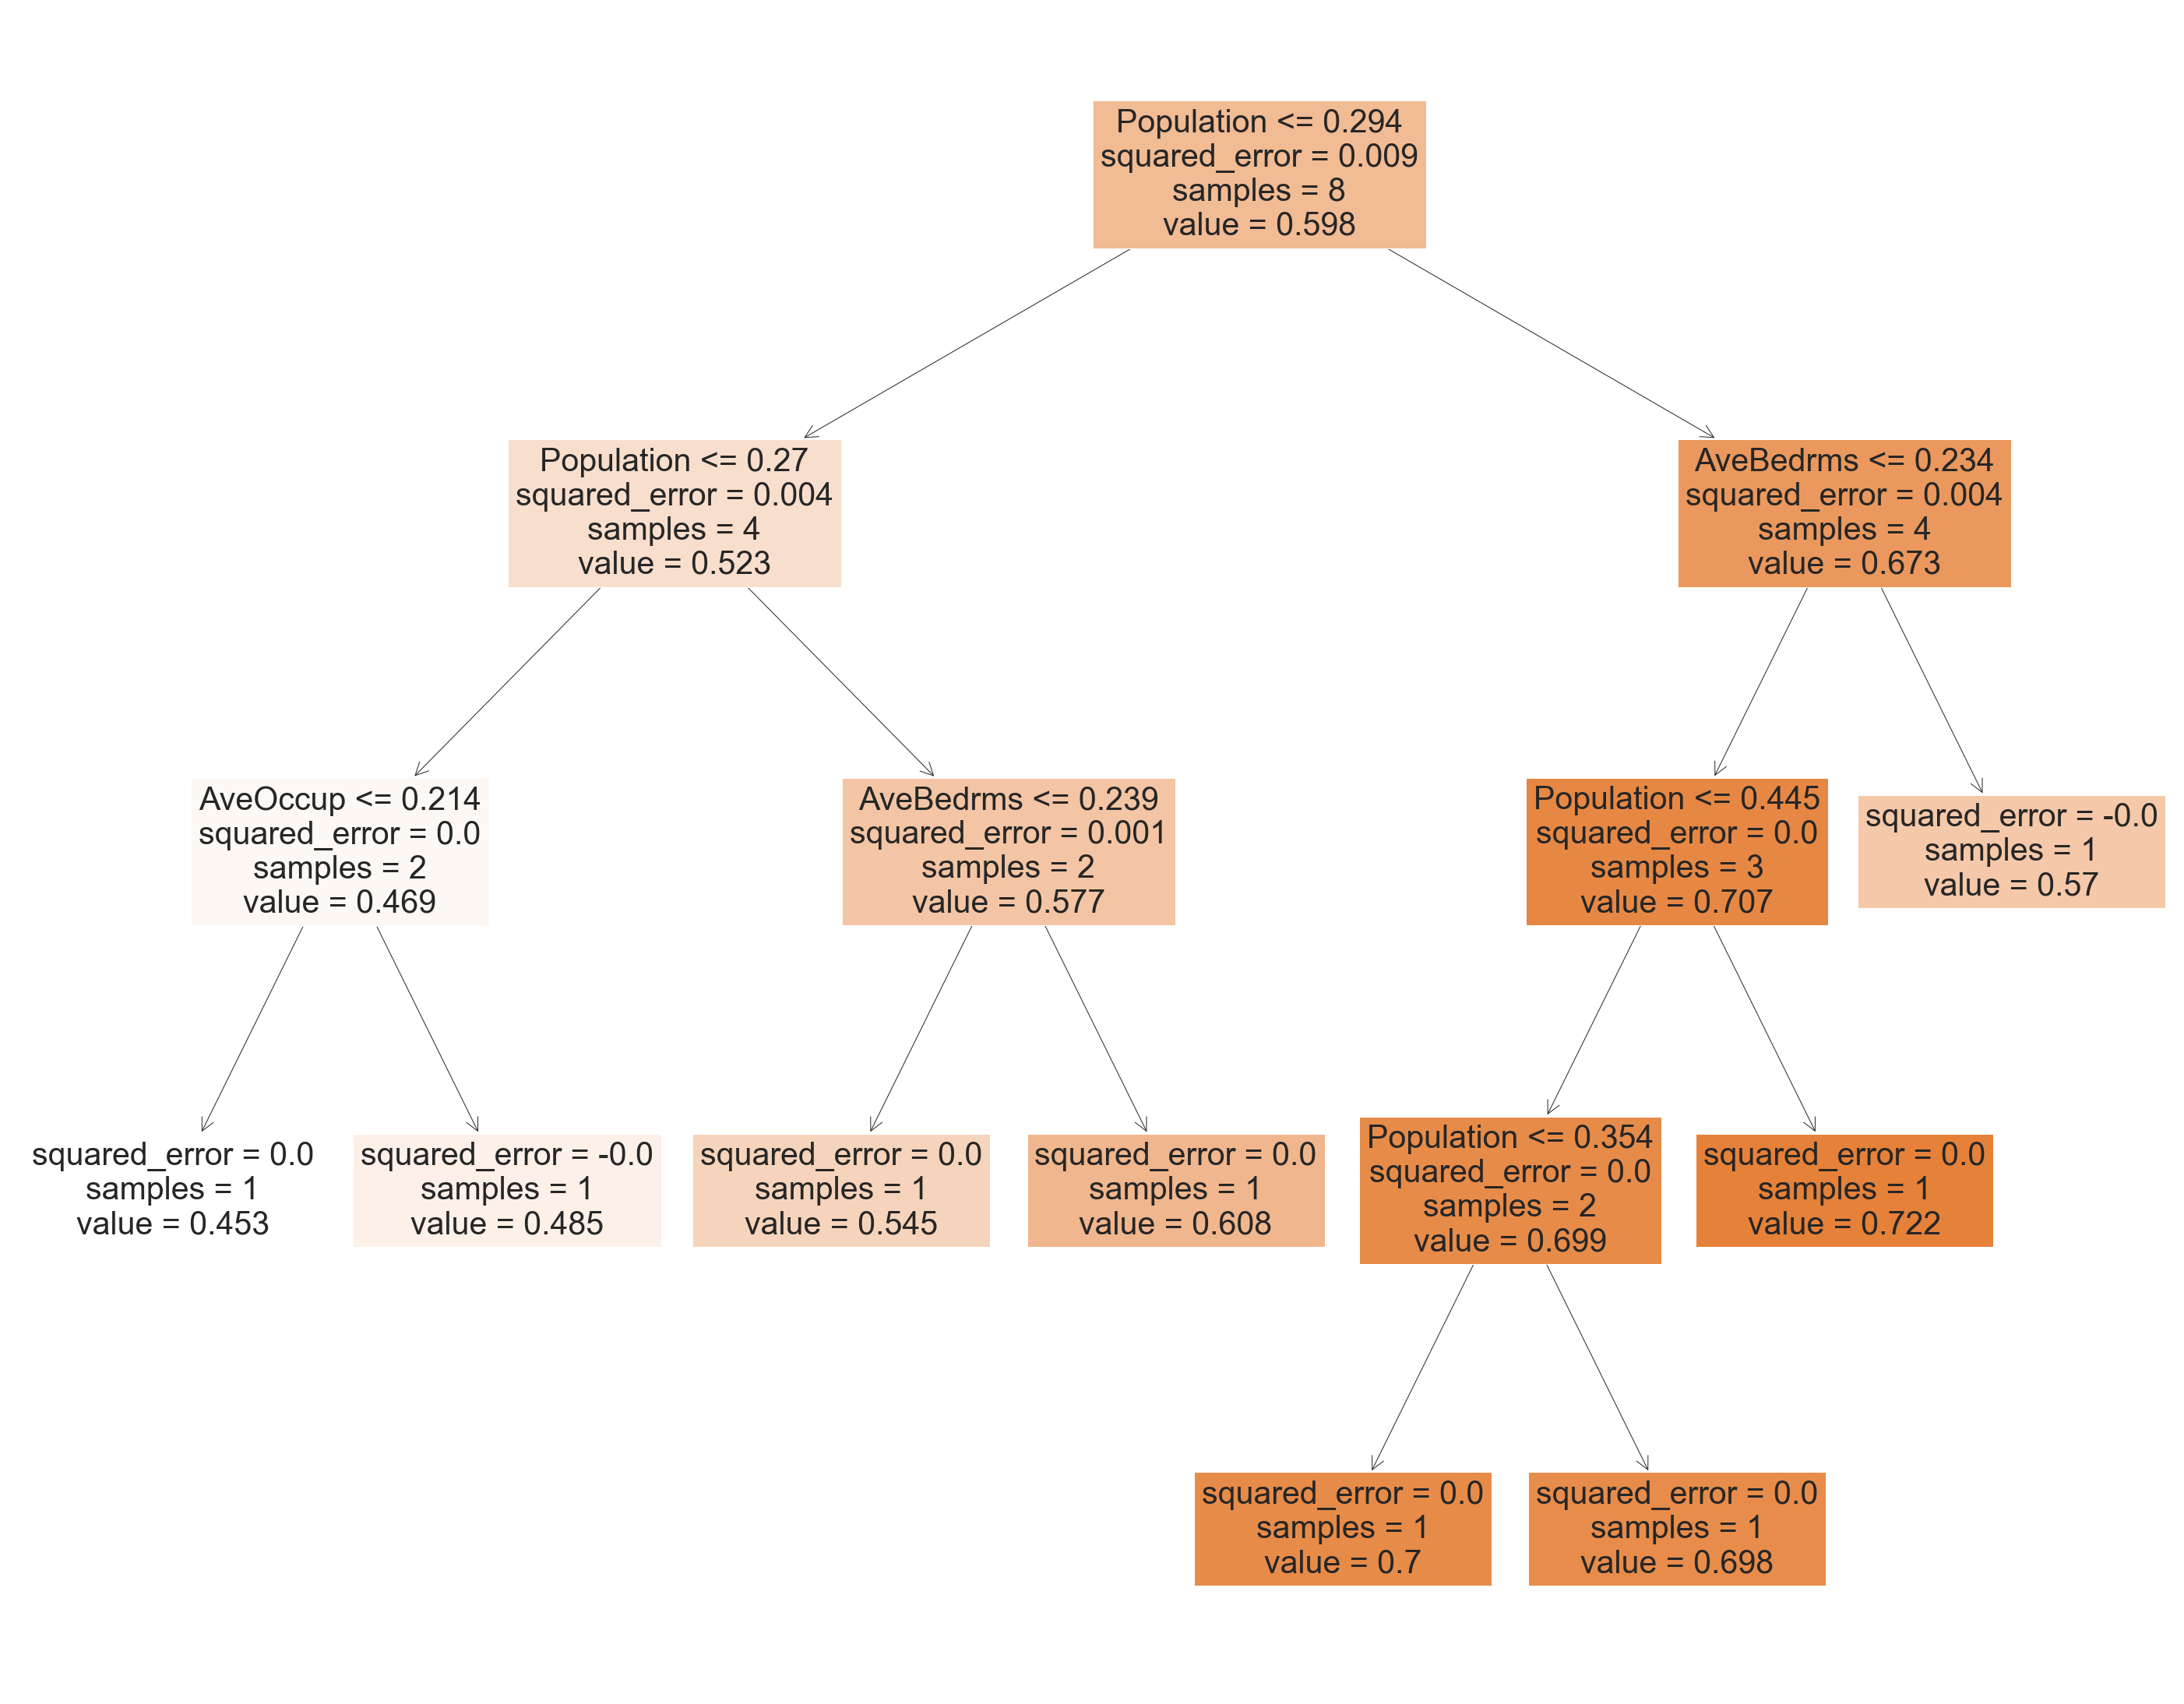

In [69]:
plt.figure(figsize=(50, 40))
plot_tree(tree1, feature_names=df.feature_names, filled=True);

Попробую оптимизировать модель настраиваемыми параметрами

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1984)
tree = DecisionTreeRegressor(random_state=1, max_depth=15, min_samples_leaf=10, max_leaf_nodes=600)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=15, max_leaf_nodes=600, min_samples_leaf=10,
                      random_state=1)

In [141]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.01
MSE на тесте 0.02


В данном случае только max_depth как-то влиял на качество. После значения 15 метрика не улучшалась. 

#### Вывод:

Модель линейной регрессии показала весьма посредственную точность. 

Дерево решений оказалось точнее, показав отличные результаты и на тренировочном и на тестовом подмножествах. 

Дерево решений выглядит гораздо привлекательнее линейной регрессии. Однако, дерево склонно к переобучению. В приведенной модели в этой работе я не увидел переобучения - даже без манипуляций с параметрами, модель показала хорошие метрики и на тренировочном и на тестовых подмножествах.
Возможно, масштабирование признаков и удаление выбросов помогли?... 